# EDA (Exploratory Data Analysis)
is the task of analyzing data from statistics, simple plotting tools, linear algebra and other techniques to understand what the dataset is, before we go to actual machine learning. Here I would like to explain the various data analysis operation, I have done on this data set.


# Data Description
The Iris flower data set is a specific set of information compiled by Ronald Fisher, a biologist, in the 1930s. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
 

# Objective:
To classify a new flower as belonging to one of three classes(Setosa, Versicolor and Virginia) given the four features (sepal length, sepal width, petal length, petal width).

# Importing libraries and loading the file
Import the required packages and load the data set.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
#This will just make the notebook easier to read down the line
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
flowers_df= pd.read_csv("IRIS.csv")
flowers_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
flowers_df["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

The value_counts() function tells how many data points for each class are present.

# Data Preparation

In [4]:
flowers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observations:**
- There are no missing values in this data set.
- All the columns are of the float data type.


# Operations:
Below code snippet will show the shape of data that is the number of columns and rows present in data.

In [5]:
flowers_df.shape

(150, 5)

This shows 150 instances of data and 5 attributes present as we see previously in introduction. You can see the labels of columns present using a single line of code as follows.

In [6]:
flowers_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Here the dtype means data type which is object type for all columns present in data.


# High-Level Statistics
Pandas describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.

In [7]:
flowers_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Observations:
- The data set contains only a small number of records (150).
- Mean is the average of all data and Standard deviation is the spread of data means how much wide the data is spread along the data set.
- Median is the centre value of data and Quantiles are the value of specific feature on nth Percentage n= 25,50,75

# Bar Plot

This Bar Plot shows the number of species for each class are present.

<AxesSubplot:>

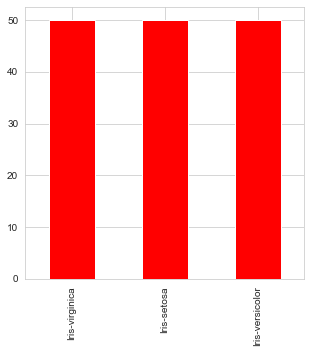

In [42]:
flowers_df['species'].value_counts().plot.bar(color = 'red', figsize = (5, 5))

# LINE PLOT

Let's try to visualize the relationship between sepal length and sepal width. Our first instinct might be to create a line chart using plt.plot.

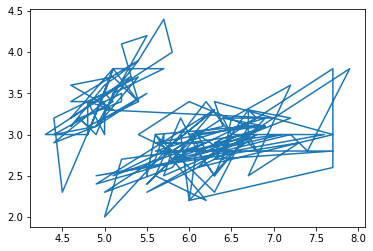

In [8]:
plt.plot(flowers_df.sepal_length, flowers_df.sepal_width)

The output is not very informative as there are too many combinations of the two properties within the dataset. There doesn't seem to be simple relationship between them.

We can use a scatter plot to visualize how sepal length & sepal width vary using the scatterplot function from the seaborn module (imported as sns).

# SCATTER PLOT
This Scatter Plot Shows the relationship between two attribute named **sepal_length & sepal_width.**

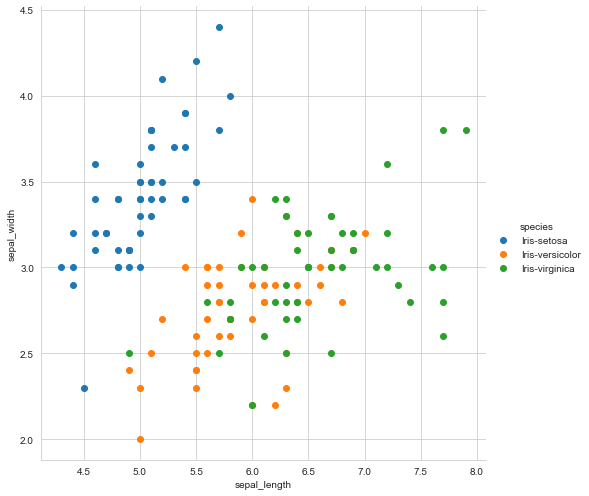

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(flowers_df, hue="species", height=7) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

From above plot, we can see that Setosa is very well separated than that of Versicolor and Virginica. By using sepal.length and sepal.width we can distinguish Setosa flowers from others. Separating versicolor and virginica is very much harder as they have considerable overlap.

Customizing Seaborn Figures
Since Seaborn uses Matplotlib's plotting functions internally, we can use functions like plt.figure and plt.title to modify the figure.



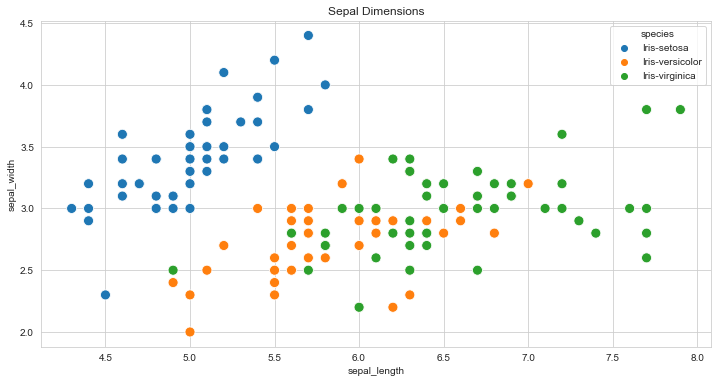

In [10]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=flowers_df.sepal_length, 
                y=flowers_df.sepal_width, 
                hue=flowers_df.species,
                s=100);

This Scatter Plot Shows the relationship between two attribute named **petal_length & petal_width**.

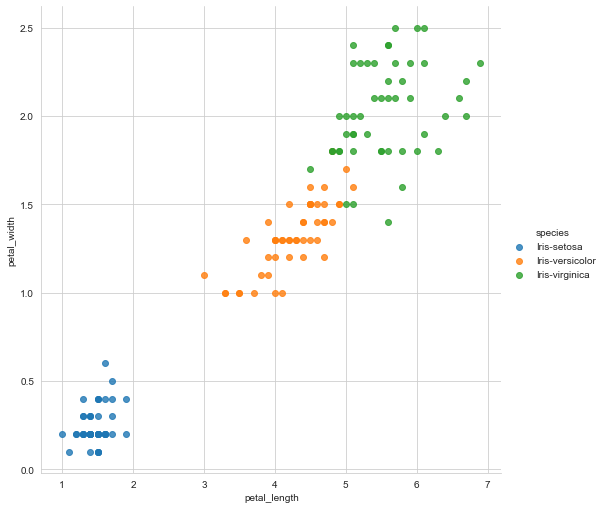

In [22]:
sns.lmplot(data=flowers_df,x='petal_length',y='petal_width',hue='species',height=7,fit_reg=False )

# HISTOGRAM

A histogram represents the distribution of a variable by creating bins (interval) along the range of values and showing vertical bars to indicate the number of observations in each bin.

For example, let's visualize the distribution of values of sepal width in the flowers dataset. We can use the plt.hist function to create a histogram.

In [11]:
flowers_df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

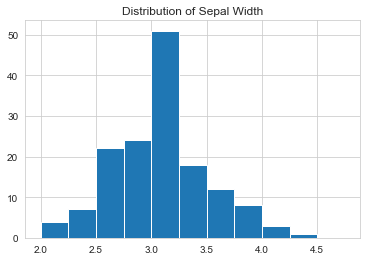

In [12]:
plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25));

We can immediately see that the sepal widths lie in the range 2.0 - 4.5, and around 35 values are in the range 2.9 - 3.1, which seems to be the most populous bin.

#### Multiple Histograms

Similar to line charts, we can draw multiple histograms in a single chart. We can reduce each histogram's opacity so that one histogram's bars don't hide the others'.

Let's draw separate histograms for each species of flowers.

In [13]:
setosa_df = flowers_df[flowers_df.species == 'Iris-setosa']
versicolor_df = flowers_df[flowers_df.species == 'Iris-versicolor']
virginica_df = flowers_df[flowers_df.species == 'Iris-virginica']

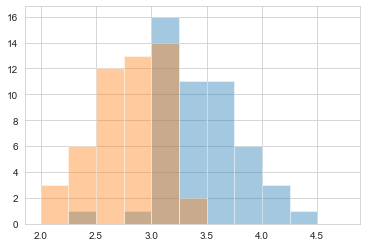

In [14]:
plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));

We can also stack multiple histograms on top of one another.

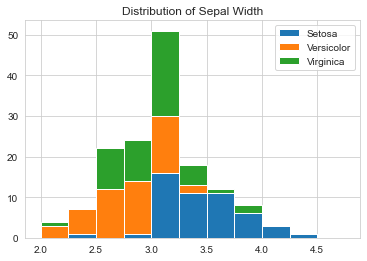

In [15]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

# Pair Plots

Seaborn also provides a helper function sns.pairplot to automatically plot several different charts for pairs of features within a dataframe.

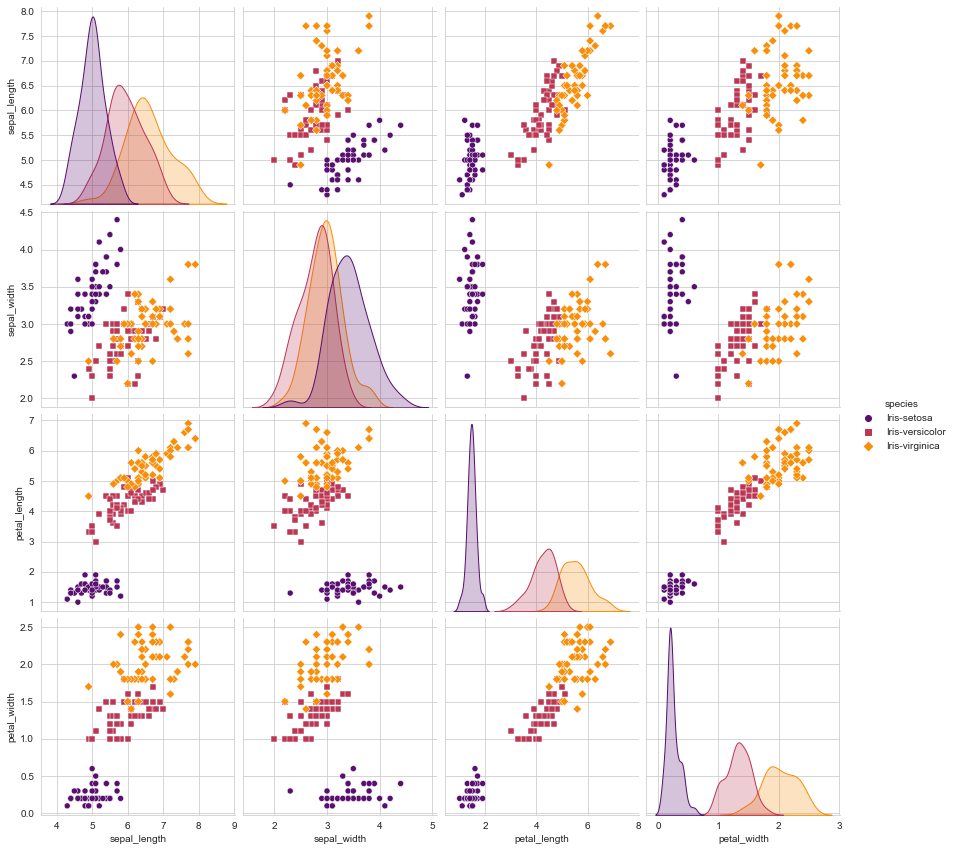

In [43]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(flowers_df, hue="species", height=3,markers=["o", "s", "D"], palette="inferno");
plt.show()


It appears petal length and petal width are the most correlated, followed by sepal length and petal length

Text(0.5, 1.0, 'Petal Length vs Sepal Length')

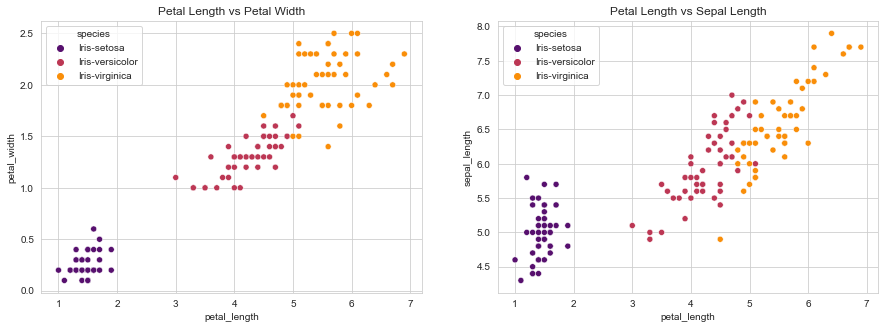

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='petal_length', y='petal_width', data=flowers_df, hue='species', palette='inferno')
plt.title('Petal Length vs Petal Width')
plt.subplot(1,2,2)
sns.scatterplot(x='petal_length', y='sepal_length', data=flowers_df, hue='species', palette='inferno')
plt.title('Petal Length vs Sepal Length')


It appears the Setosa species is the most separable, so let's look at that by itself



In [48]:
setosa = flowers_df[flowers_df['species']=='Iris-setosa']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Setosa Petal Width vs Petal Length')

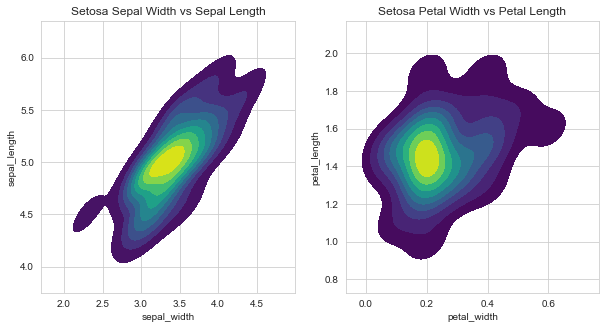

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap="viridis", shade=True, shade_lowest=False)
plt.title('Setosa Sepal Width vs Sepal Length')
plt.subplot(1,2,2)
sns.kdeplot(setosa['petal_width'], setosa['petal_length'], cmap="viridis", shade=True, shade_lowest=False)
plt.title('Setosa Petal Width vs Petal Length')

# Comparing different Flowers and there Seperation area

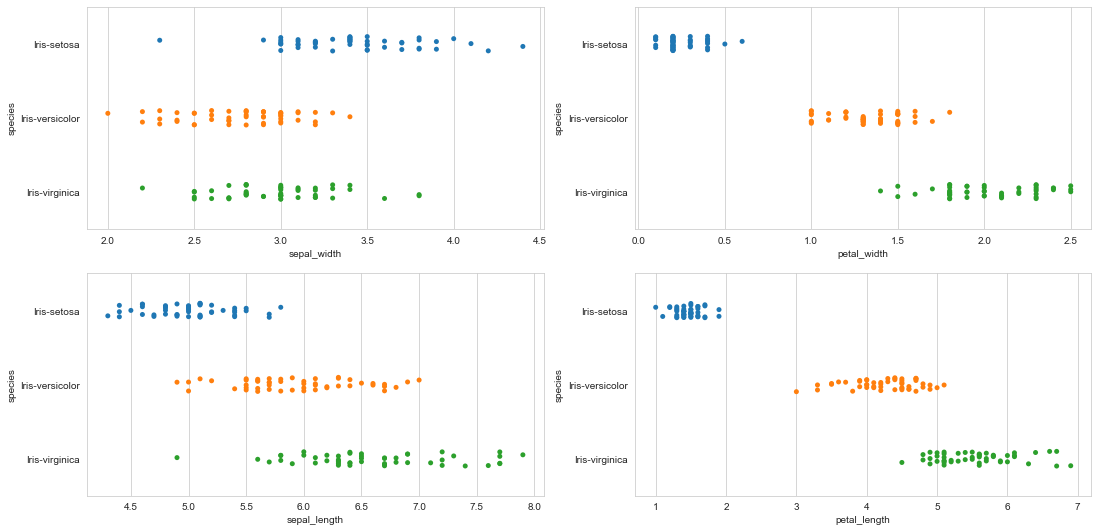

In [25]:
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(18,9))
sns.stripplot(y='species',x='petal_width',data=flowers_df,ax=axis[0,1])
sns.stripplot(y='species',x='petal_length',data=flowers_df,ax=axis[1,1])
sns.stripplot(y='species',x='sepal_width',data=flowers_df,ax=axis[0,0])
sns.stripplot(y='species',x='sepal_length',data=flowers_df,ax=axis[1,0])
plt.show()

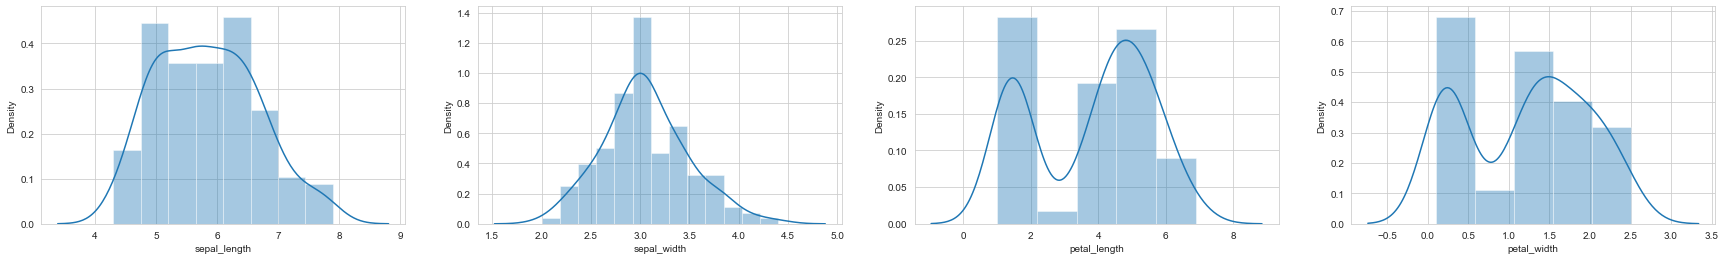

In [26]:
fig,ax=plt.subplots(nrows=1 ,ncols=4)
sns.distplot(flowers_df['sepal_length'],ax=ax[0])
sns.distplot(flowers_df['sepal_width'],ax=ax[1])
sns.distplot(flowers_df['petal_length'],ax=ax[2])
sns.distplot(flowers_df['petal_width'],ax=ax[3])
fig.set_figwidth(30)

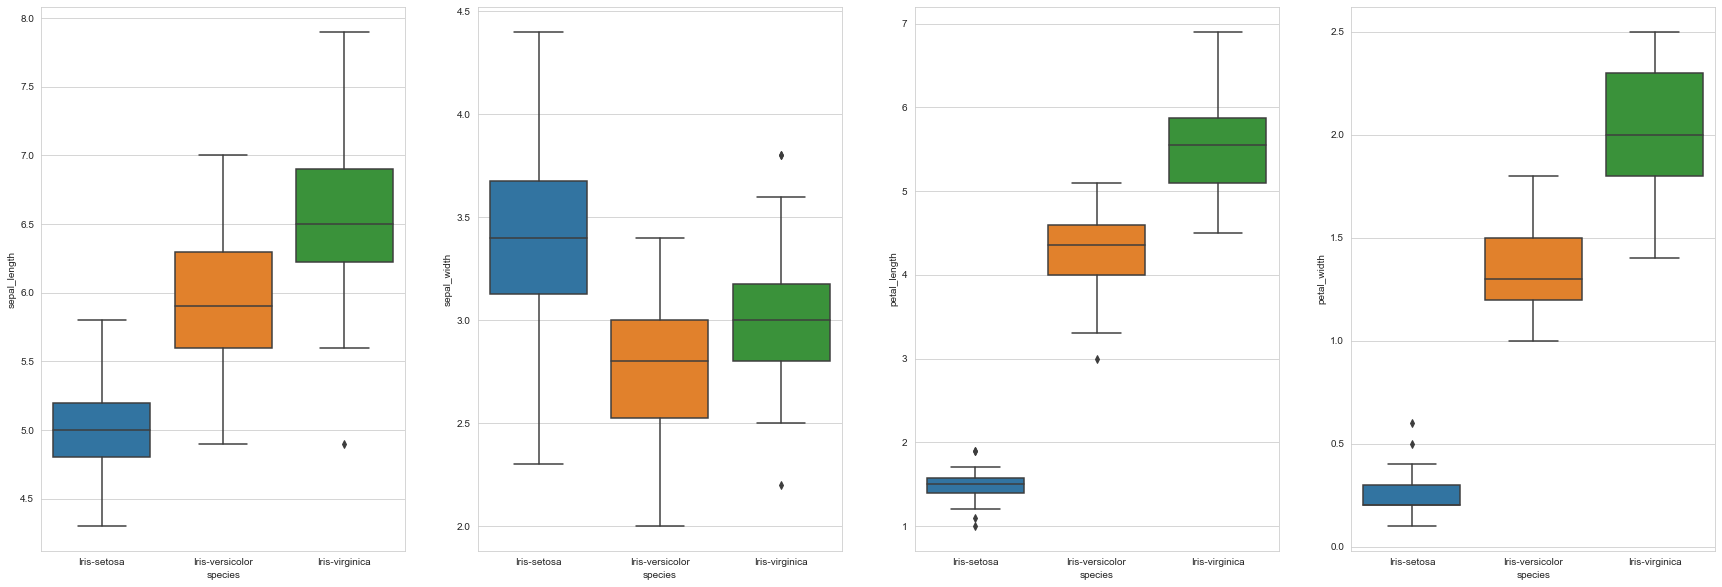

In [29]:
fig,axis=plt.subplots(nrows=1,ncols=4)
sns.boxplot(data=flowers_df,x='species',y='sepal_length',ax=axis[0])
sns.boxplot(data=flowers_df,x='species',y='sepal_width',ax=axis[1])
sns.boxplot(data=flowers_df,x='species',y='petal_length',ax=axis[2])
sns.boxplot(data=flowers_df,x='species',y='petal_width',ax=axis[3])
fig.set_figwidth(30)
fig.set_figheight(10)
plt.show()

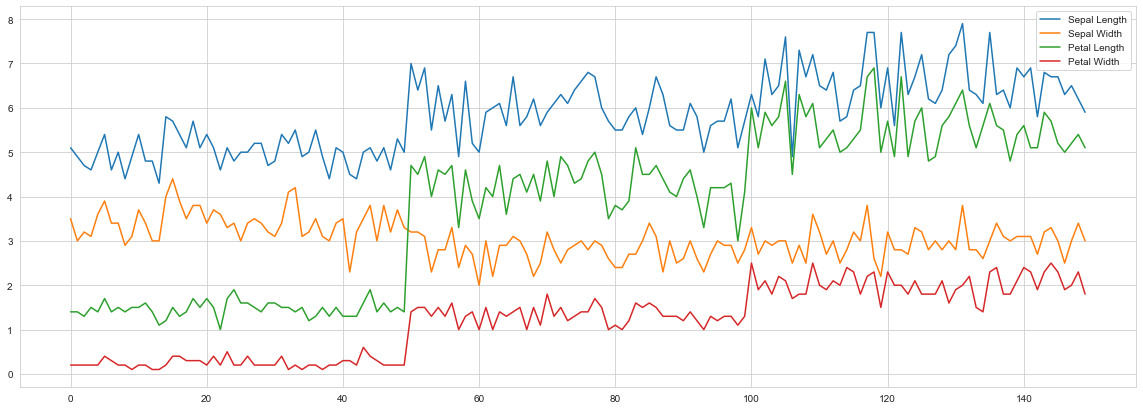

In [30]:
fig=plt.figure(figsize=(20,7))
flowers_df.iloc[:,0].plot(label='Sepal Length')
flowers_df.iloc[:,1].plot(label='Sepal Width')
flowers_df.iloc[:,2].plot(label='Petal Length')
flowers_df.iloc[:,3].plot(label='Petal Width')
leg=plt.legend()
plt.show()

# Correlation Between Attributes

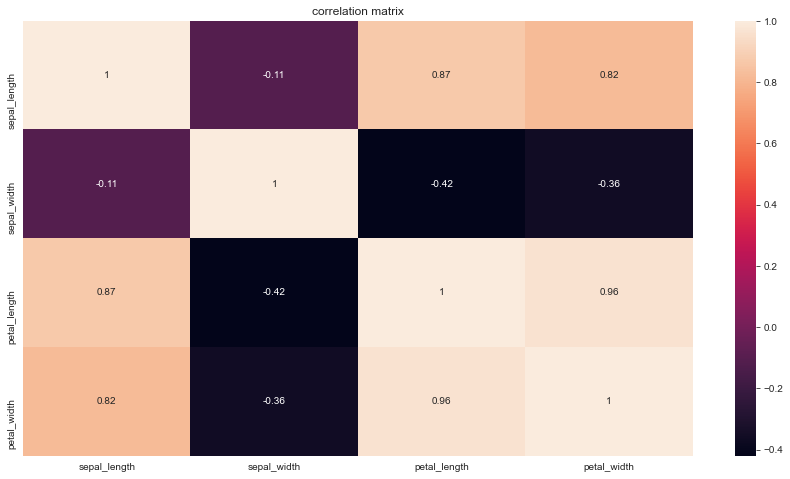

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(flowers_df.corr(),annot=True)
plt.title('correlation matrix')
plt.show()

# Observations:
The plot between petal.length and petal.width is comparatively better. While Setosa can be easily identified Versicolor and Virginica have some overlap. We can use “if-else” condition to build a simple model to classify the flower types.

# CONCLUSIONS:
Yes, you can classify the new flower belonging to one of three classes(Setosa, Versicolor and Virginia) using iris Data set by applying various data analysis techniques and using various Python libraries.